In [1]:
import numpy as np
import matplotlib.pyplot as plt
from molecule import CaOH, CaH, mu_N, gI
from scipy.constants import h, k
%matplotlib inline

import qls
import utils as ut


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/sdruci

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/sdruci

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/sdruci

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/sdruci/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/sdruci

AttributeError: _ARRAY_API not found

In [2]:
# Taken from Chou et al.

gj_list: list[float] = [-1.35, -1.35, -1.35, -1.34, -1.34, -1.34, -1.34, -1.34, -1.33, -1.33, -1.33, -1.32, -1.32, -1.31, -1.31]

cij_list: list[float] = [8.27, 8.26, 8.26, 8.26, 8.26, 8.25, 8.25, 8.24, 8.24, 8.23, 8.22, 8.21, 8.20, 8.19, 8.18]

b_field_gauss = 3.6
j_max = 14

# mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max, gj_list = gj_list, cij_list = cij_list)

temperature = 300
states1 = qls.States(mo1, temperature)


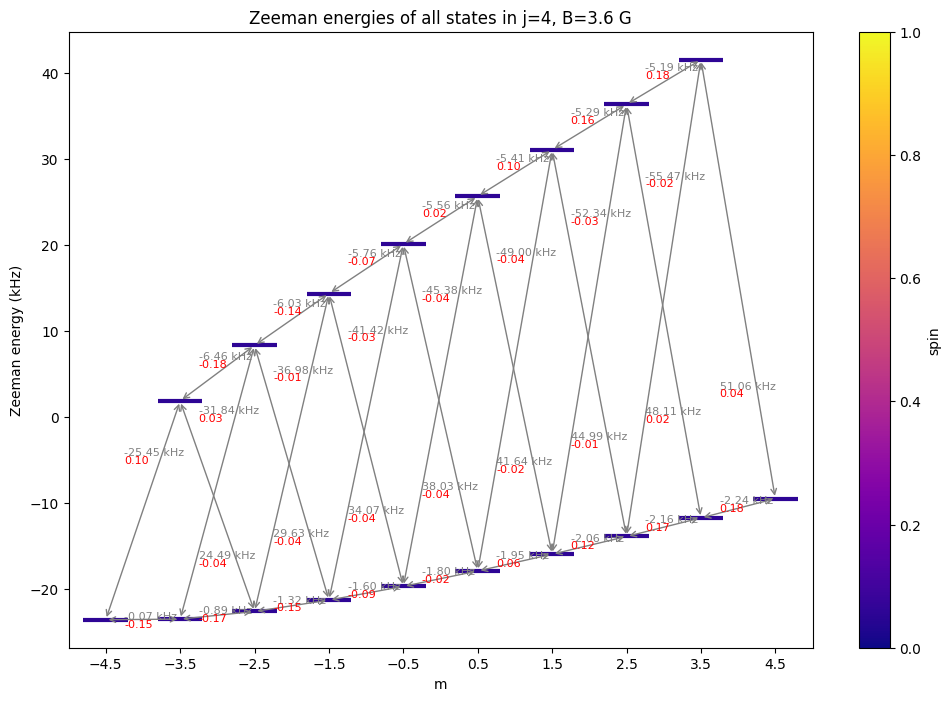

In [3]:
ut.plot_state_dist(mo1, 4)

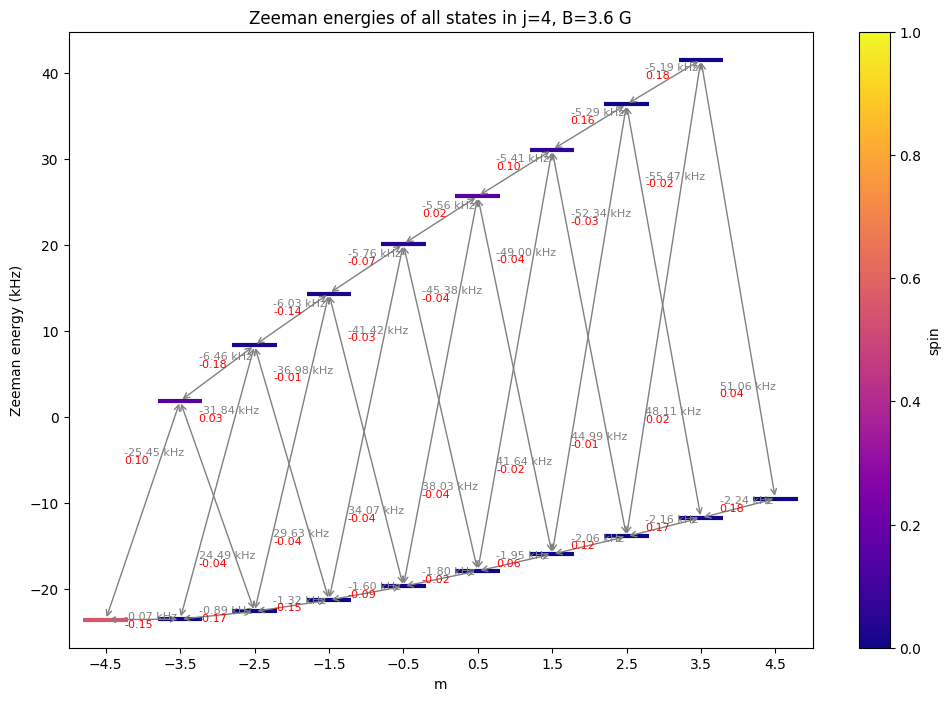

In [4]:
signature_transitions = np.array([mo1.transition_df.loc[mo1.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(1, mo1.j_max+1)])


duration_us = 1000.0
rabi_rate_mhz = 2*np.pi*0.005
max_frequency_mhz = 0.05        # 50 kHz
scan_points = 1000
dephased = False
coherence_time_us = 100
is_minus = True

pump_frequency_mhz = -0.002
num_pumps = 200
pump_dephased = True
pump_rabi_rate_mhz = 2*np.pi*0.004
pump_duration_us = 1000.0




# Pumping
for _ in range(num_pumps):
    exc_matrix = qls.excitation_matrix(mo1, pump_frequency_mhz, pump_duration_us, pump_rabi_rate_mhz, pump_dephased, coherence_time_us, is_minus).dot(mo1.state_df["state_dist"])
    mo1.state_df["state_dist"] += exc_matrix


    mask = mo1.state_df["state_dist"] < 0
    if np.abs(sum(exc_matrix)) >= 1e-10:
        raise ValueError("Error: sum of exc_matrix is not 0")

    if (mo1.state_df["state_dist"].shape) != (exc_matrix.shape):
        raise ValueError(f"Error: Shape mismatch. state_dist has shape {mo1.state_df['state_dist'].shape}, but exc_matrix has shape {exc_matrix.shape}")

    if np.sum(mask) > 0 : 
        raise ValueError("Error: state_dist contains negative values")
    

ut.plot_state_dist(mo1, 4)

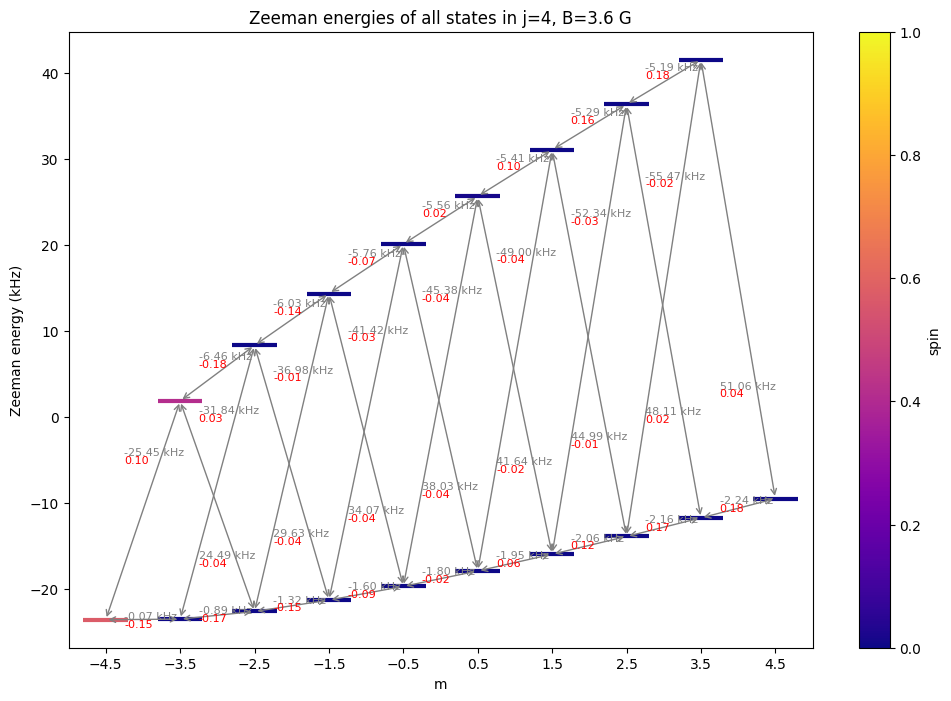

In [5]:
duration_us = 1000.0
rabi_rate_mhz = 2*np.pi*0.005
max_frequency_mhz = 0.05        # 50 kHz
scan_points = 1000
dephased = False
coherence_time_us = 100
is_minus = True

pump_frequency_mhz = -0.006
num_pumps = 200
pump_dephased = True
pump_rabi_rate_mhz = 2*np.pi*0.004
pump_duration_us = 1000.0




# Pumping
for _ in range(num_pumps):
    exc_matrix = qls.excitation_matrix(mo1, pump_frequency_mhz, pump_duration_us, pump_rabi_rate_mhz, pump_dephased, coherence_time_us, is_minus).dot(mo1.state_df["state_dist"])
    mo1.state_df["state_dist"] += exc_matrix


    mask = mo1.state_df["state_dist"] < 0
    if np.abs(sum(exc_matrix)) >= 1e-10:
        raise ValueError("Error: sum of exc_matrix is not 0")

    if (mo1.state_df["state_dist"].shape) != (exc_matrix.shape):
        raise ValueError(f"Error: Shape mismatch. state_dist has shape {mo1.state_df['state_dist'].shape}, but exc_matrix has shape {exc_matrix.shape}")

    if np.sum(mask) > 0 : 
        raise ValueError("Error: state_dist contains negative values")
    
    
ut.plot_state_dist(mo1, 4)

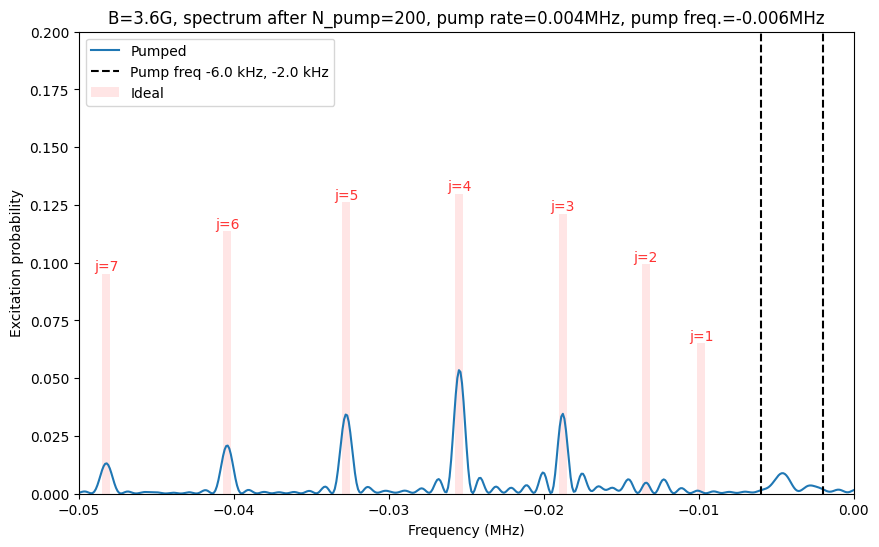

In [6]:
duration_us = 1000.0
rabi_rate_mhz = 2*np.pi*0.005
max_frequency_mhz = 0.05        # 50 kHz
scan_points = 1000
dephased = False
coherence_time_us = 100
is_minus = True


fig, ax = plt.subplots(figsize=(10, 6))

frequencies, exc_probs1_after = qls.get_spectrum(mo1, mo1.state_df["state_dist"], duration_us, rabi_rate_mhz, max_frequency_mhz, scan_points, dephased, is_minus)

ax.plot(frequencies, exc_probs1_after, label = f"Pumped")      # Plot after pumping



ax.bar(signature_transitions, states1.j_distribution()[1:], color="red", width=0.0005, alpha=0.1, label = "Ideal")
ax.axvline(x=-0.002, color='black', linestyle='--')
ax.axvline(x=-0.006, color='black', linestyle='--', label=f'Pump freq {-0.006*(1e3)} kHz, {-0.002*(1e3)} kHz')
ax.legend()
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Excitation probability")
ax.set_title(f"B={b_field_gauss}G, spectrum after N_pump={num_pumps}, pump rate={pump_rabi_rate_mhz/(2*np.pi):.3f}MHz, pump freq.={pump_frequency_mhz}MHz")

a_lim = -max_frequency_mhz
b_lim = 0
ax.set_xlim([a_lim, b_lim])
ax.set_ylim([0, 0.2])

for i in range(j_max):
    if signature_transitions[i] >= a_lim and signature_transitions[i] <= b_lim:
        ax.text(signature_transitions[i], states1.j_distribution()[i+1], f"j={i+1}", ha='center', va='bottom', color='red', alpha=0.8)

plt.show()


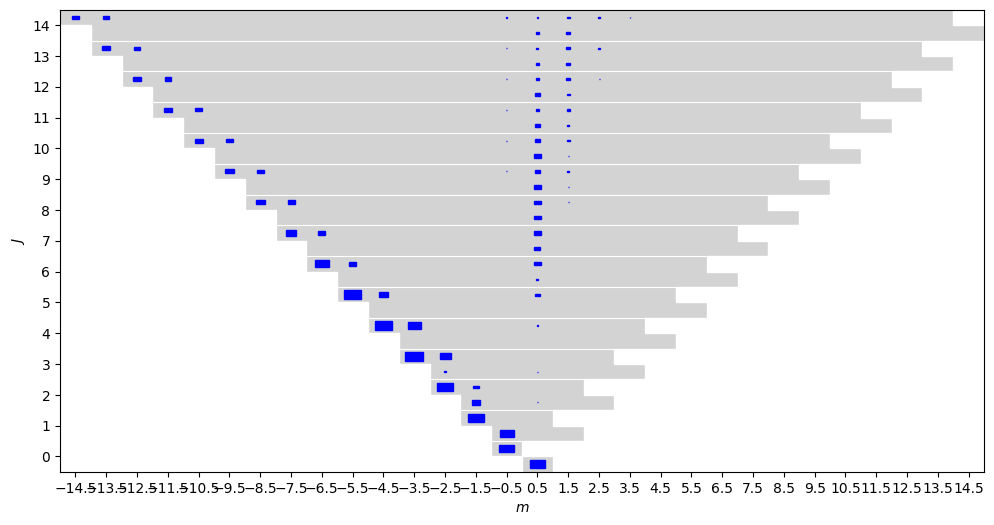

In [7]:
matrix = ut.heatmap_state_pop(mo1.state_df, j_max, normalize = True)

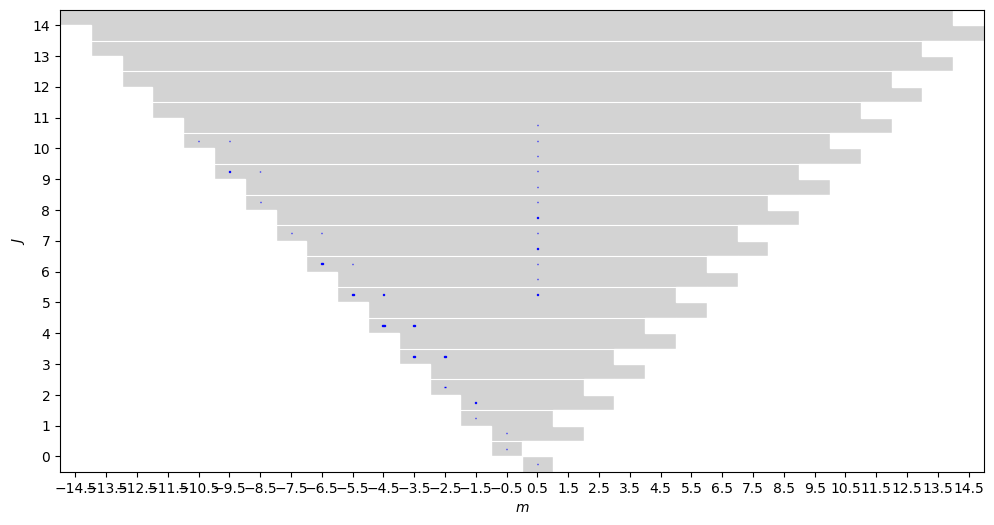

In [8]:
matrix = ut.heatmap_state_pop(mo1.state_df, j_max, normalize = False)

In [9]:
# matrix = heatmap_state_pop(mo1.state_df)

# CaOH

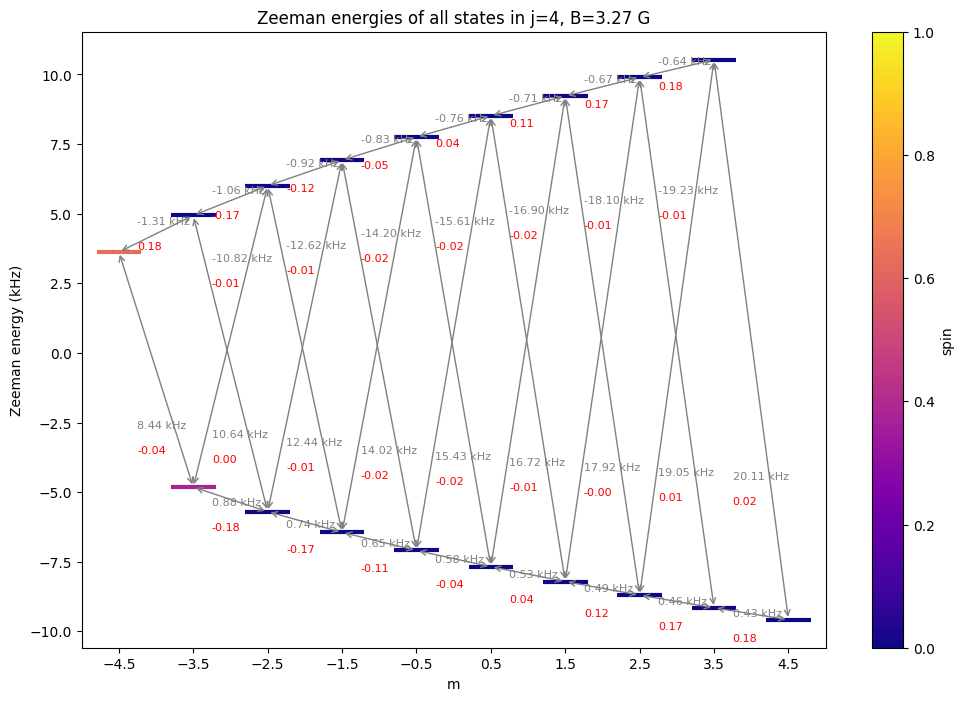

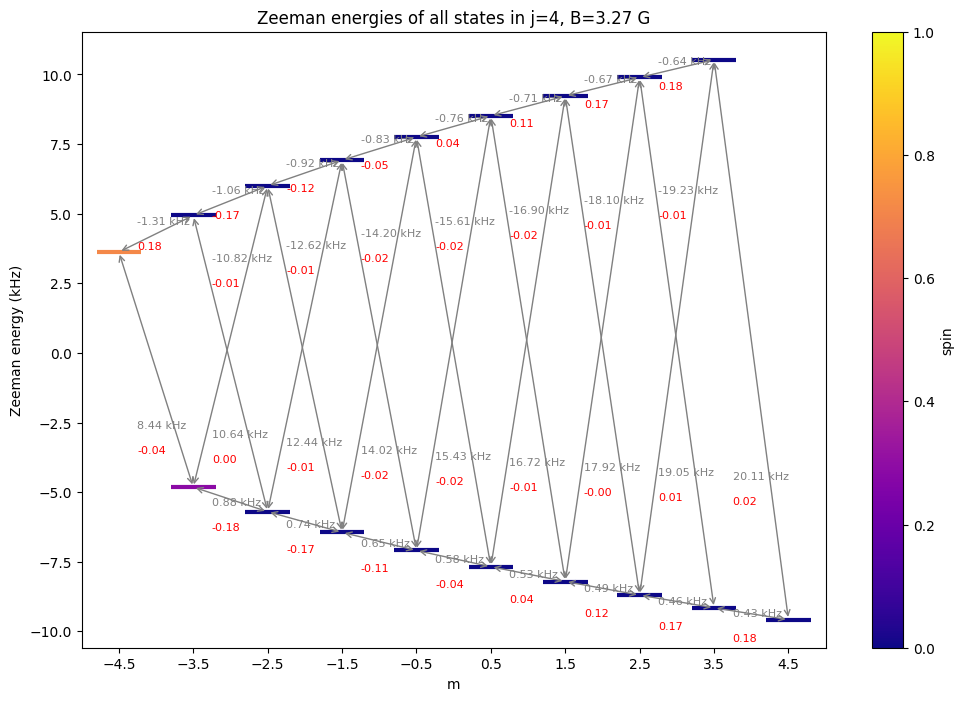

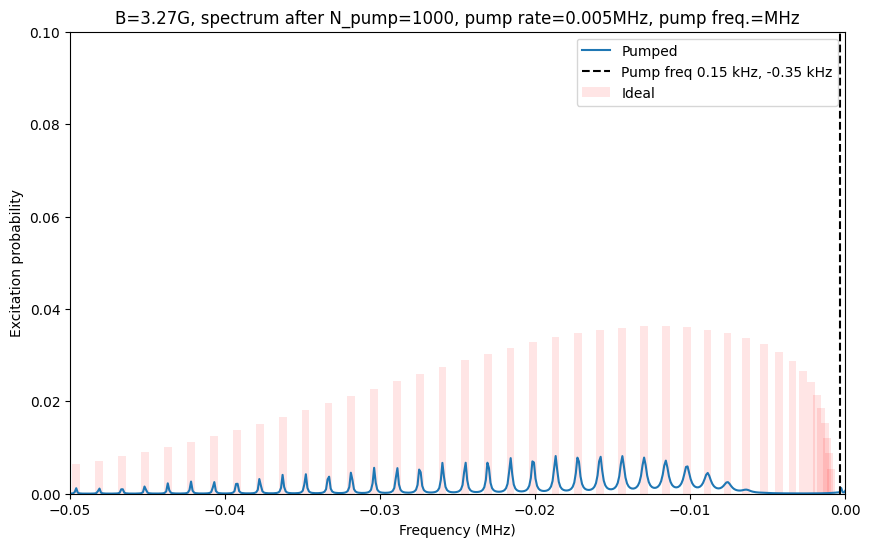

In [10]:
b_field_gauss = 3.27
j_max = 50

mo1 = CaOH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)

temperature = 300
states1 = qls.States(mo1, temperature)


signature_transitions = np.array([mo1.transition_df.loc[mo1.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(1, mo1.j_max+1)])

duration_us = 5000.0
rabi_rate_mhz = 2*np.pi*0.005
max_frequency_mhz = 0.05
scan_points = 1000
dephased = True
coherence_time_us = 100
is_minus = True


# Before
frequencies, exc_probs1_before = qls.get_spectrum(mo1, mo1.state_df["state_dist"], duration_us, rabi_rate_mhz, max_frequency_mhz, scan_points, dephased, is_minus)
# plt.plot(frequencies, exc_probs1_before, label = "Unpumped")


# After

pump_frequency_mhz_1 = 0.00015
num_pumps = 1000
pump_rabi_rate_mhz = 2*np.pi*0.005
pump_duration_us = 1000.0


for _ in range(num_pumps):
    mo1.state_df["state_dist"] += qls.excitation_matrix(mo1, pump_frequency_mhz_1, pump_duration_us, pump_rabi_rate_mhz, dephased, is_minus).dot(mo1.state_df["state_dist"])
    
ut.plot_state_dist(mo1, 4)

pump_frequency_mhz_2 = -0.00035

for _ in range(num_pumps):
    mo1.state_df["state_dist"] += qls.excitation_matrix(mo1, pump_frequency_mhz_2, pump_duration_us, pump_rabi_rate_mhz, dephased, is_minus).dot(mo1.state_df["state_dist"])

ut.plot_state_dist(mo1, 4)

frequencies, exc_probs1_after = qls.get_spectrum(mo1, mo1.state_df["state_dist"], duration_us, rabi_rate_mhz, max_frequency_mhz, scan_points, dephased, is_minus)



fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(frequencies, exc_probs1_after, label = f"Pumped")

ax.bar(signature_transitions, states1.j_distribution()[1:], color="red", width=0.0005, alpha=0.1, label = "Ideal")
ax.axvline(x=pump_frequency_mhz_2, color='black', linestyle='--')
ax.axvline(x=pump_frequency_mhz_1, color='black', linestyle='--', label=f'Pump freq {pump_frequency_mhz_1*(1e3)} kHz, {pump_frequency_mhz_2*(1e3)} kHz')
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Excitation probability")
ax.set_title(f"B={b_field_gauss}G, spectrum after N_pump={num_pumps}, pump rate={pump_rabi_rate_mhz/(2*np.pi):.3f}MHz, pump freq.=MHz")

a_lim = -max_frequency_mhz
b_lim = 0

ax.set_xlim([a_lim, b_lim])
ax.set_ylim([0, 0.2])
ax.set_ylim(0,0.1)
ax.legend()
plt.show()

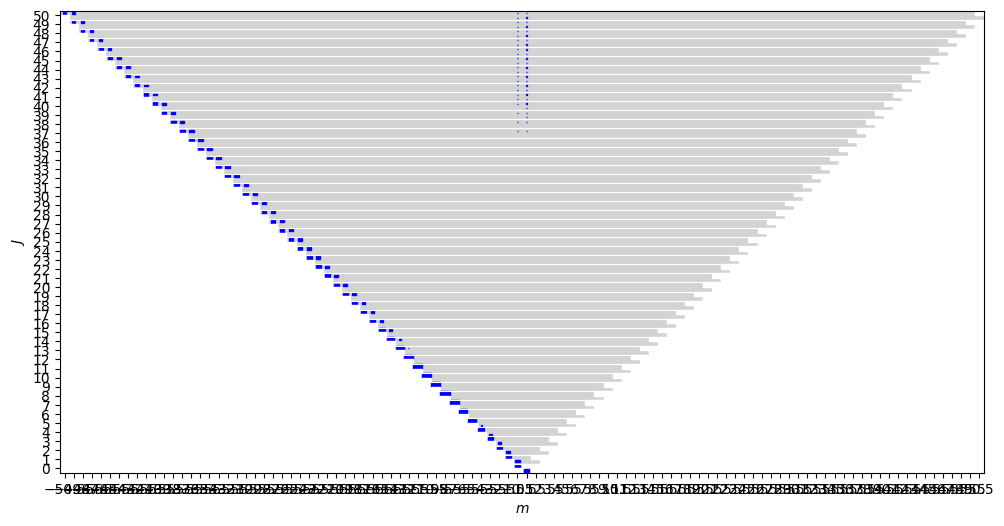

In [11]:
matrix = ut.heatmap_state_pop(mo1.state_df, j_max, normalize = True)

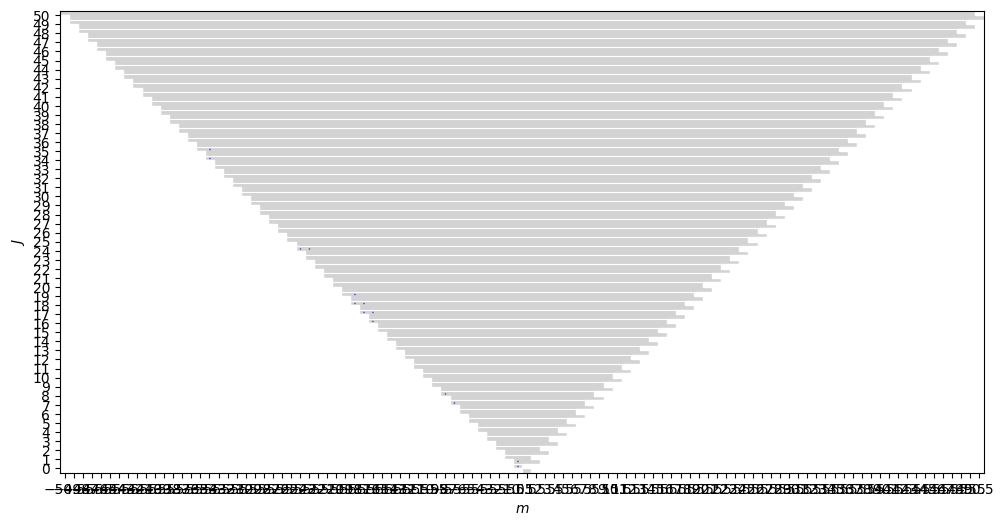

In [12]:
matrix = ut.heatmap_state_pop(mo1.state_df, j_max, normalize = False)